In [253]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal, stats
from scipy.fftpack import fft, ifft, fftfreq
import pickle


Here we will attempt to extract the long-term trend of uptake and CO2 concentration timeseries by applying a low pass filter to the original annual (and monthly) timeseries to remove the interannual time scales and shorter.

# Sample case

In [184]:
df = pd.read_csv("./../Output/output_raw/output_JENA_s76.csv", index_col="Year")
x = df.index.values
y = df["Earth_Land"].values

In [163]:
X = fft(y)
freqs = fftfreq(len(y))

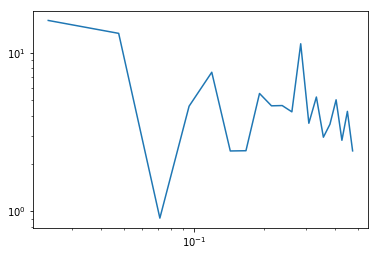

In [164]:
plt.loglog(freqs[1:21], abs(X)[1:21])

In [160]:
df_monthly = pickle.load(open("./../Output/output_raw/output_all/JENA_s76_all/spatial.pik", "rb"))

In [161]:
y_month = df_monthly.Earth_Land.values

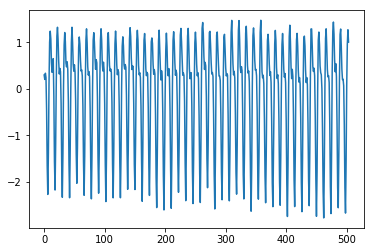

In [259]:
plt.plot(y_month)

In [258]:
si = stats.linregress(range(len(y_month)), y_month)

In [261]:
line = si[0]*range(len(y_month))+si[2]

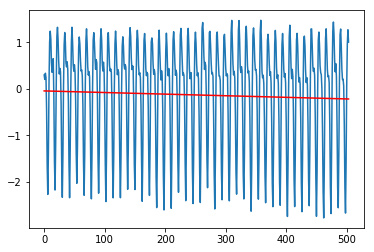

In [262]:
plt.plot(y_month)
plt.plot(line, color='r')

In [263]:
yup = y_month-line

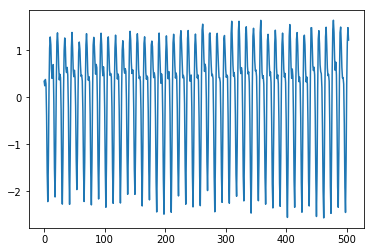

In [264]:
plt.plot(yup)

In [266]:
X_month = fft(yup)
freqs_month = fftfreq(len(yup))

In [265]:
yup.size

504

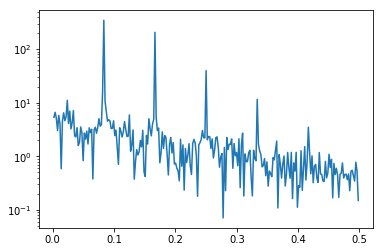

In [305]:
%matplotlib inline
plt.semilogy(freqs_month[1:int(yup.size/2)], abs(X_month)[1:int(yup.size/2)])

In [247]:
1/(0.02*12)

4.166666666666667

(-3, 2)

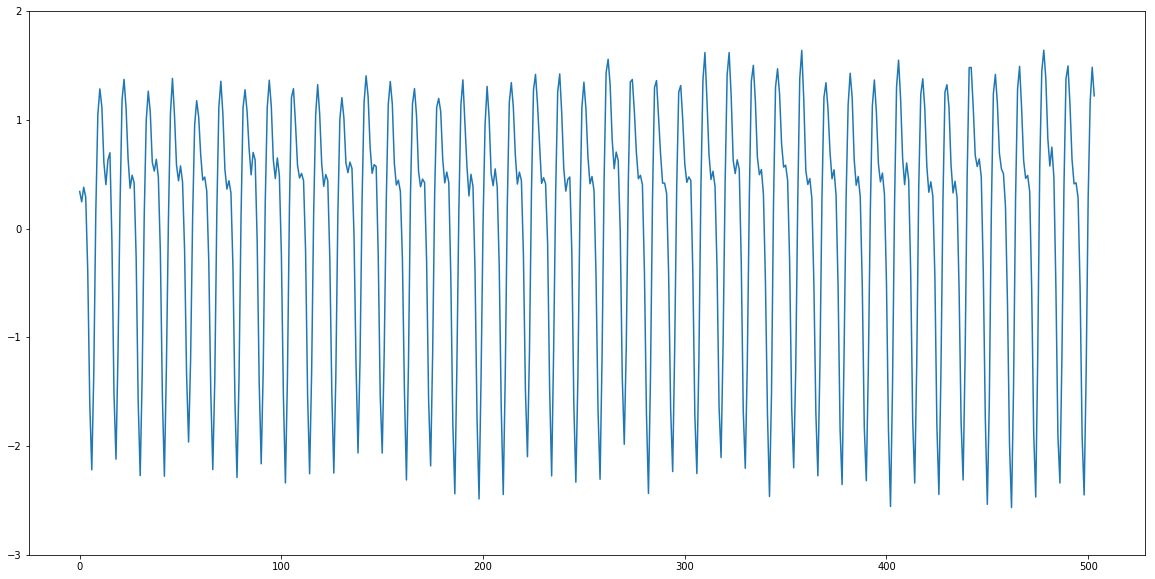

In [268]:
plt.figure(figsize=(20,10))
plt.plot(yup)
plt.ylim([-3,2])

In [370]:
lower = 0.001*12
upper = 0.007*12
1./lower, 1./upper

(83.33333333333333, 11.904761904761903)

In [371]:
XX = X_month.copy()
for i in range(int(yup.size/2)):
    if freqs_month[:int(yup.size/2)][i] > 1./lower or freqs_month[:int(yup.size/2)][i] > 1./upper:
        XX[i] = 0.0
        XX[int(yup.size/2) + i] = 0.0
inverse = ifft(XX)

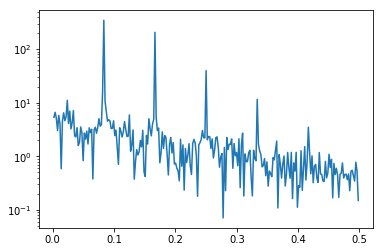

In [372]:
plt.semilogy(freqs_month[1:int(yup.size/2)], abs(XX)[1:int(yup.size/2)])

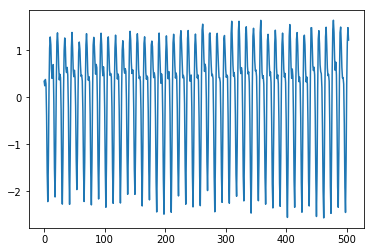

In [373]:
plt.plot(yup)

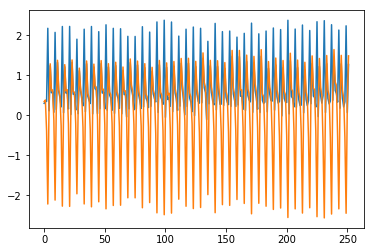

In [376]:
%matplotlib inline
plt.plot((abs(inverse)+line)[::2])
plt.plot(yup[::2])
# plt.ylim([-3,2])

In [375]:
(abs(inverse)+line)[::2]

array([ 0.29794807,  0.33632685,  0.34718011,  2.17268174,  0.11040363,
        1.23778484,  0.56092812,  0.58327511,  0.07461338,  2.07020309,
        0.14214756,  1.32162925,  0.59105763,  0.43832235,  0.20770575,
        2.21768876,  0.06146057,  1.20881675,  0.55466698,  0.58083864,
        0.15727692,  2.2191202 ,  0.01888633,  1.32203663,  0.52639977,
        0.51643641,  0.12785554,  1.90050319,  0.03931597,  1.11325494,
        0.61470501,  0.40932798,  0.23459504,  2.15003827,  0.08943185,
        1.28767974,  0.47711824,  0.37104605,  0.29238527,  2.21773115,
        0.03318121,  1.20536677,  0.66243404,  0.62772994,  0.04101188,
        2.08808875,  0.16422641,  1.28935307,  0.55499395,  0.57281667,
        0.15556956,  2.26015774,  0.12465613,  1.20727675,  0.50292395,
        0.4262231 ,  0.12412714,  2.17187844,  0.04586911,  1.24004295,
        0.50996992,  0.41184142,  0.17351717,  2.16140611,  0.0362169 ,
        1.11647774,  0.51553823,  0.52186758, -0.04133507,  1.97